In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [259]:
bcast_binarytree = pd.read_csv('bcast_binarytree.csv')
bcast_chain = pd.read_csv('bcast_chain.csv')
bcast_linear = pd.read_csv('bcast_linear.csv')

# Define the list of algorithms and their corresponding DataFrames
algorithms = ['Linear', 'Chain', 'Binarytree']
dfs = [bcast_linear, bcast_chain, bcast_binarytree]
allocations = ['core', 'socket', 'node']

In [260]:
def plot_latency_vs_processes(algorithms, dfs, allocation, message_size):
    #plt.figure(figsize=(10, 6))

    # Iterate over each algorithm's DataFrame
    for algorithm, df in zip(algorithms, dfs):
        # Filter DataFrame based on allocation and message size
        df_filtered = df[(df['Allocation'] == allocation) & (df['MessageSize'] == message_size)]
        
        # Plot number of processes vs. latency
        plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=algorithm)

    # Set labels and title
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Num Processes (Map-by: {allocation.capitalize()}, Message Size: {message_size})')
    plt.legend()
    plt.grid(True)

    for i in [12, 24, 36]:
        plt.axvline(x=i, linestyle='--', color='gray')

In [261]:
def plot_latency_vs_message_size(algorithms, dfs, allocation, num_processes):
    #plt.figure(figsize=(10, 6))

    # Iterate over each algorithm's DataFrame
    for algorithm, df in zip(algorithms, dfs):
        # Filter DataFrame based on allocation and number of processes
        df_filtered = df[(df['Allocation'] == allocation) & (df['Processes'] == num_processes)]
        
        # Plot message size vs. latency
        plt.plot(df_filtered['MessageSize'], df_filtered['Latency'], label=algorithm)

    # Set labels and title
    plt.xlabel('Message Size')
    plt.ylabel('Latency')
    plt.title(f'Latency vs. Message Size (Map-by: {allocation.capitalize()}, Processes: {num_processes})')
    plt.legend()
    plt.grid(True)

In [262]:
def plot_latency_vs_processes_fixed_alg(df, algorithm, message_size, allocations):
    # Iterate over each allocation strategy
    for allocation in allocations:
        # Filter DataFrame based on the specific algorithm, message size, and allocation
        df_filtered = df[(df['Algorithm'] == algorithm) & 
                         (df['MessageSize'] == message_size) &
                         (df['Allocation'] == allocation)]
        
        # Plot number of processes vs. latency for this allocation
        plt.plot(df_filtered['Processes'], df_filtered['Latency'], label=f'{allocation.capitalize()}')

    # Set labels and title
    plt.xlabel('Number of Processes')
    plt.ylabel('Latency (us)')
    plt.title(f'Latency vs. Num Processes for Alg: {algorithm}, Message Size: {message_size}')
    plt.legend()
    plt.grid(True)


In [299]:
def plot_3d_latency(df, allocation, ax):

    # Filter the DataFrame for the specified allocation
    df_filtered = df[df['Allocation'] == allocation]

    # Extract x, y, z data
    x = df_filtered['Processes']
    y = df_filtered['MessageSize']
    z = df_filtered['Latency']

    # Create a grid for the 3D surface
    grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 50), 
                                 np.linspace(y.min(), y.max(), 50))
    
    # Interpolate z values on the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

    # Plot the surface on the provided axis
    surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')

    # Add a color bar
    fig = ax.get_figure()  # Get the figure from the axis
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)

    # Set labels for axes
    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Message Size')
    ax.set_zlabel('Latency (us)')

    # Set title
    ax.set_title(f'Latency vs. Processes and Message Size (Allocation: {allocation})')
    ax.view_init(elev=30, azim=150)



In [264]:
def triple_plot(strings, numbers, plot_func, *args):
    """
    Creates a triple plot by calling the given plotting function on each pair of string and number.
    
    Parameters:
    - strings: list of 3 strings
    - numbers: list of 3 numbers
    - plot_func: function to call for plotting, e.g., plot_latency_vs_message_size
    - *args: additional arguments to pass to the plot_func (like algorithms, dfs, etc.)
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Iterate through each string and number combination, and call the plot_func
    for i in range(3):
        plt.sca(axs[i])  # Set current axis
        plot_func(*args, strings[i], numbers[i])  # Call the plotting function

    plt.tight_layout()
    plt.show()

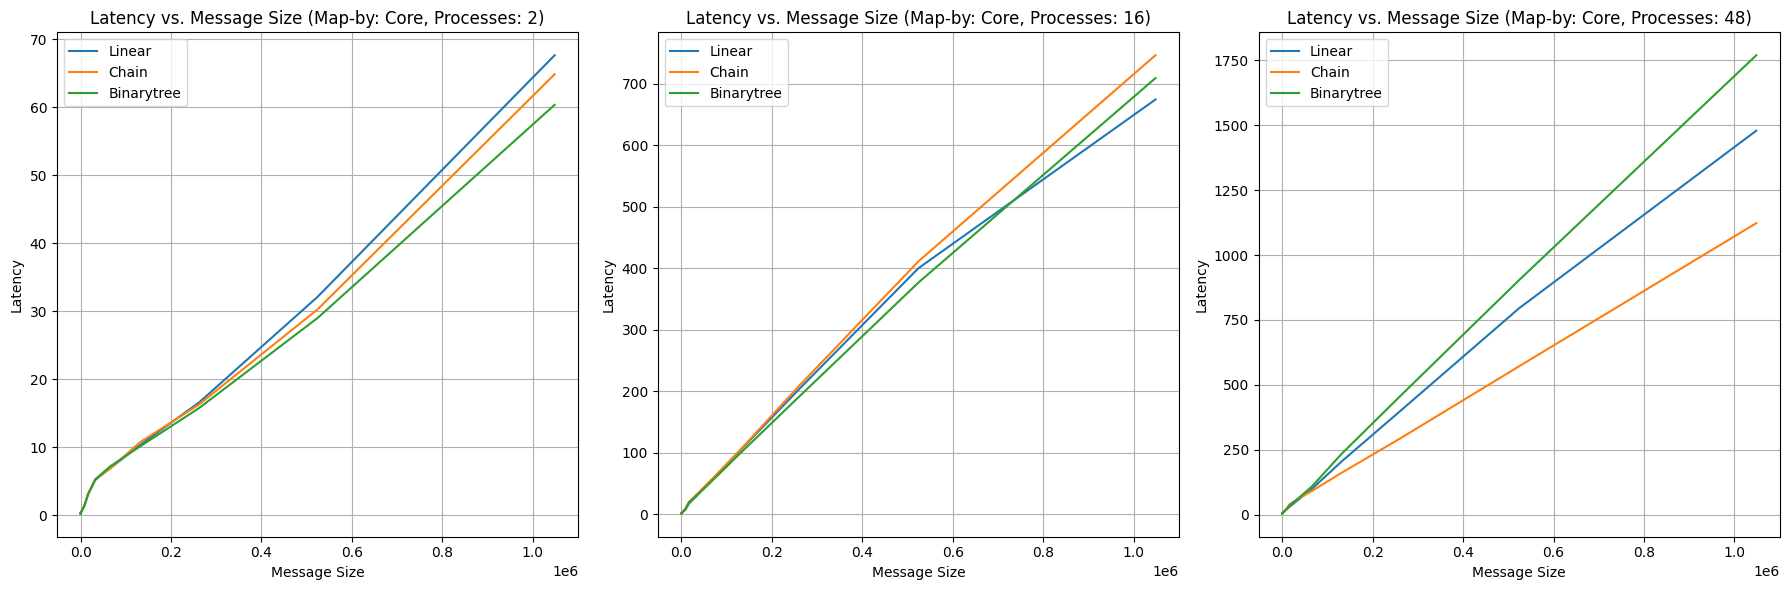

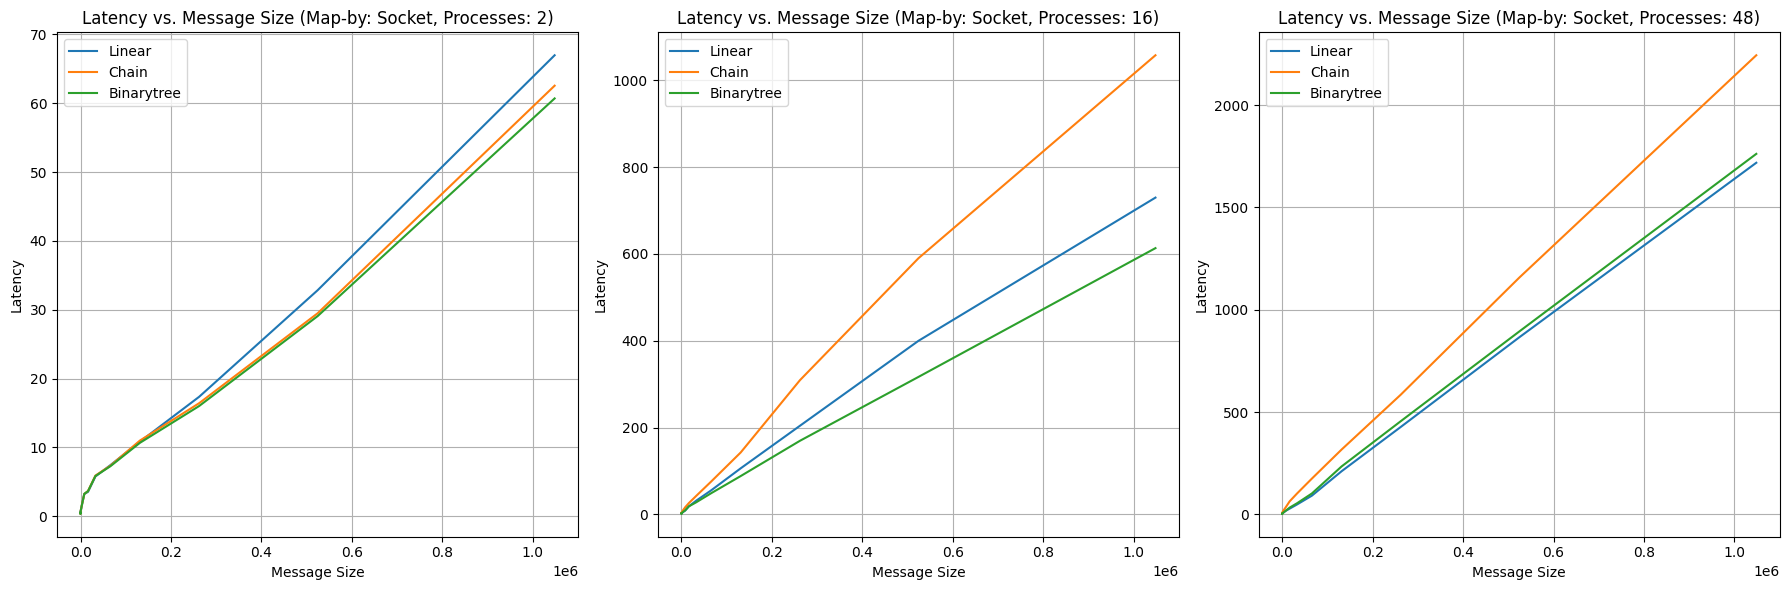

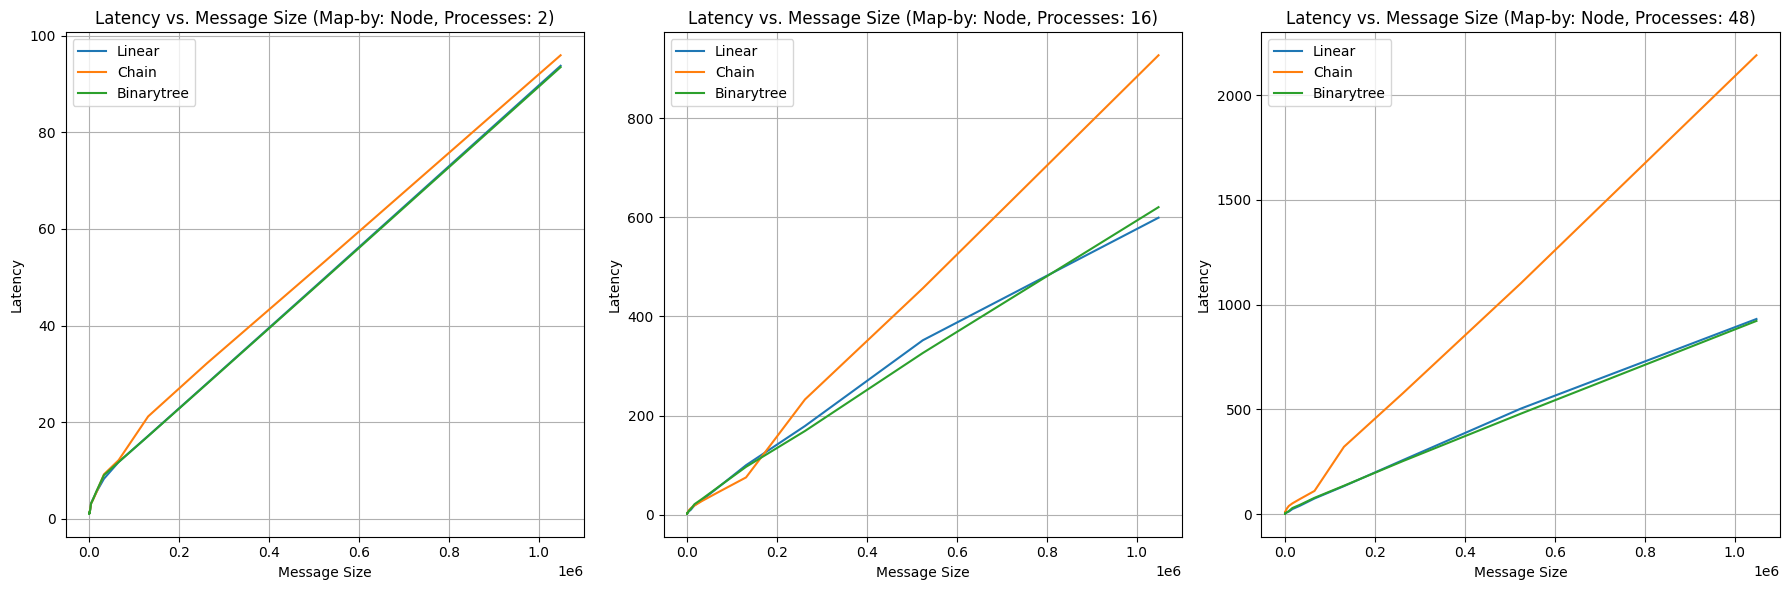

In [265]:
triple_plot(['core', 'core', 'core'], [2, 16, 48], plot_latency_vs_message_size, algorithms, dfs)
triple_plot(['socket', 'socket', 'socket'], [2, 16, 48], plot_latency_vs_message_size, algorithms, dfs)
triple_plot(['node', 'node', 'node'], [2, 16, 48], plot_latency_vs_message_size, algorithms, dfs)

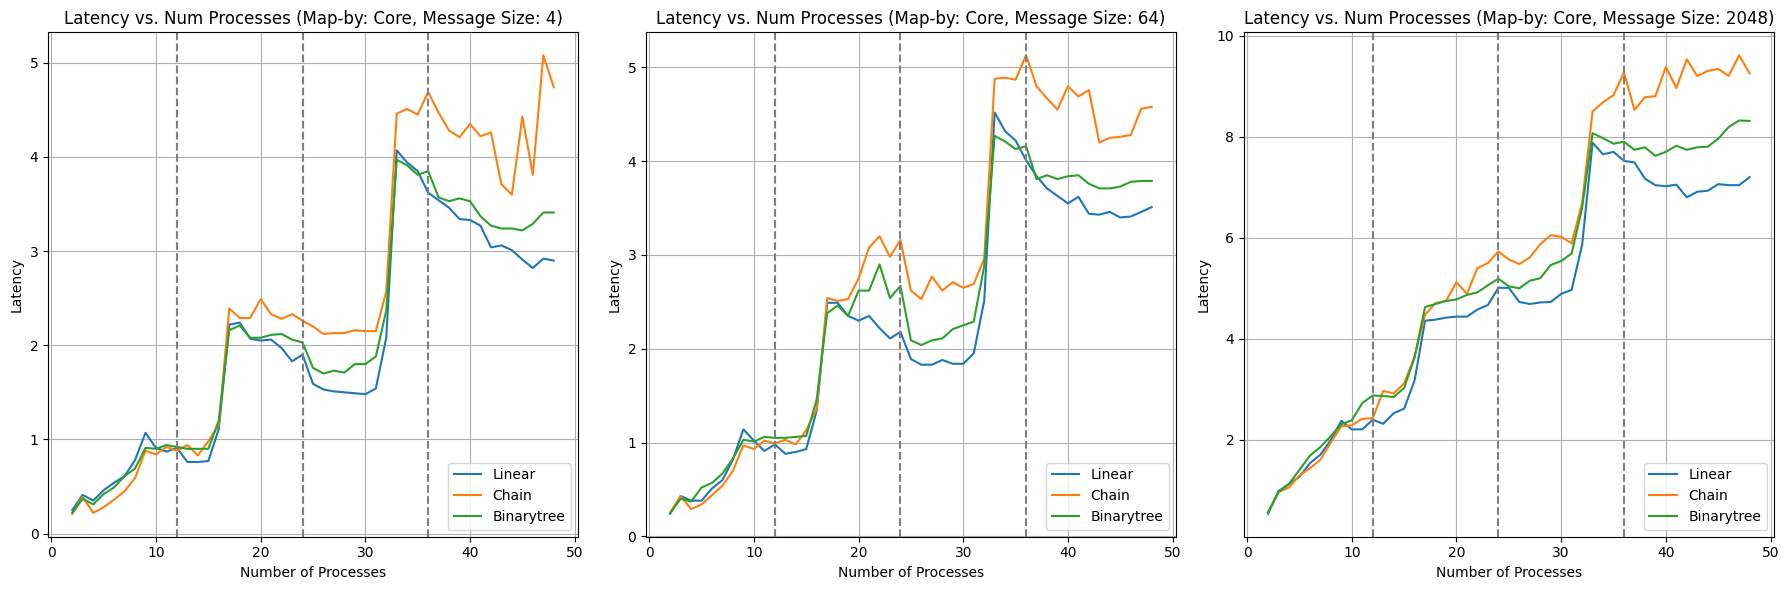

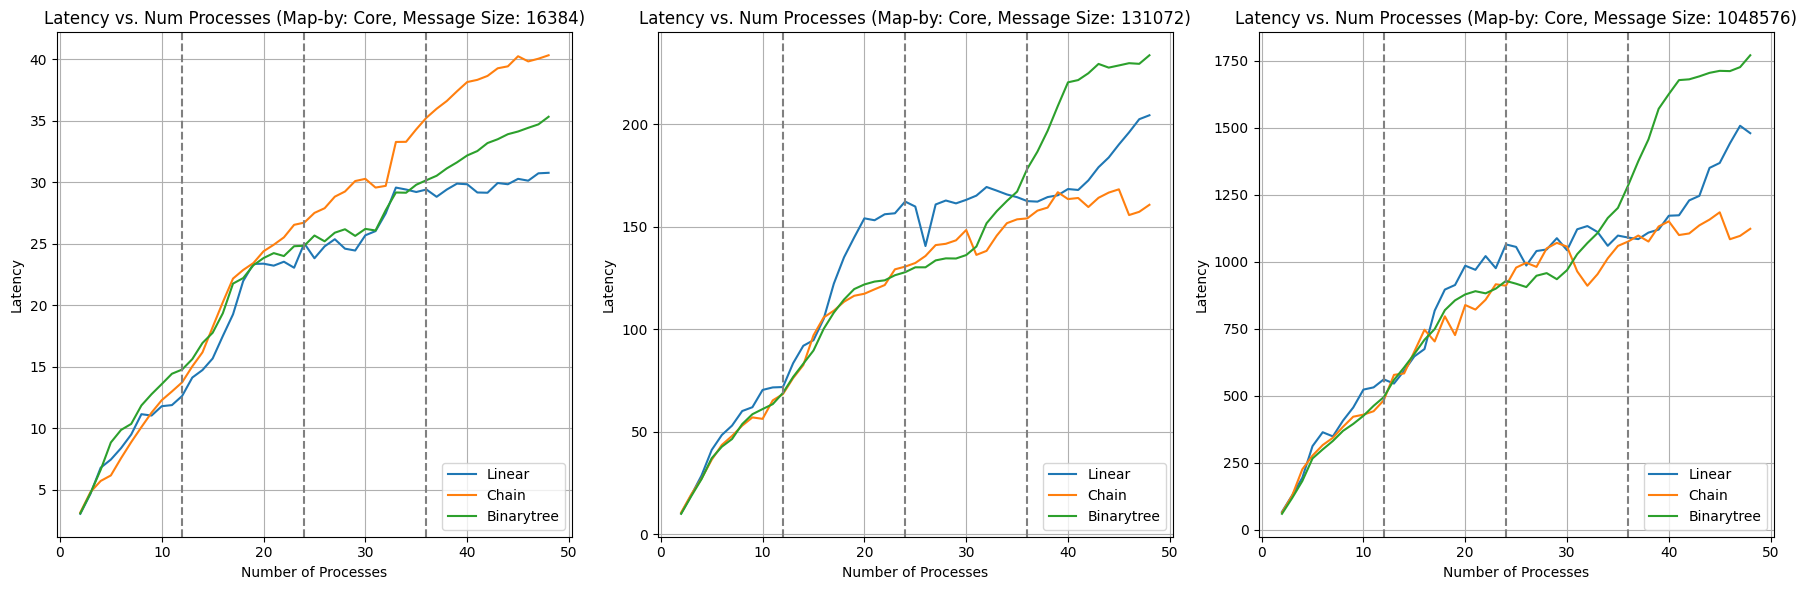

In [266]:
triple_plot(['core', 'core', 'core'], [4, 64, 2048], plot_latency_vs_processes, algorithms, dfs)
triple_plot(['core', 'core', 'core'], [16384, 131072, 1048576], plot_latency_vs_processes, algorithms, dfs)

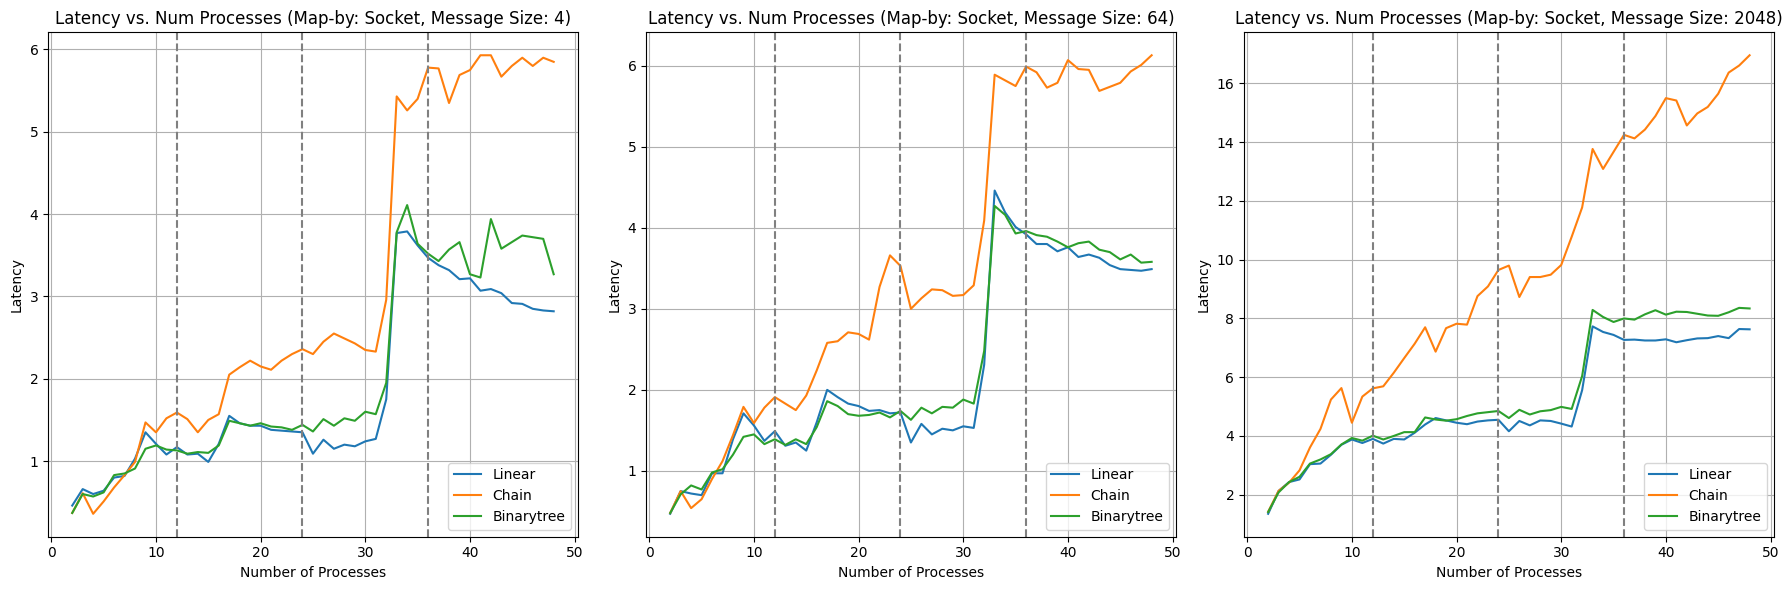

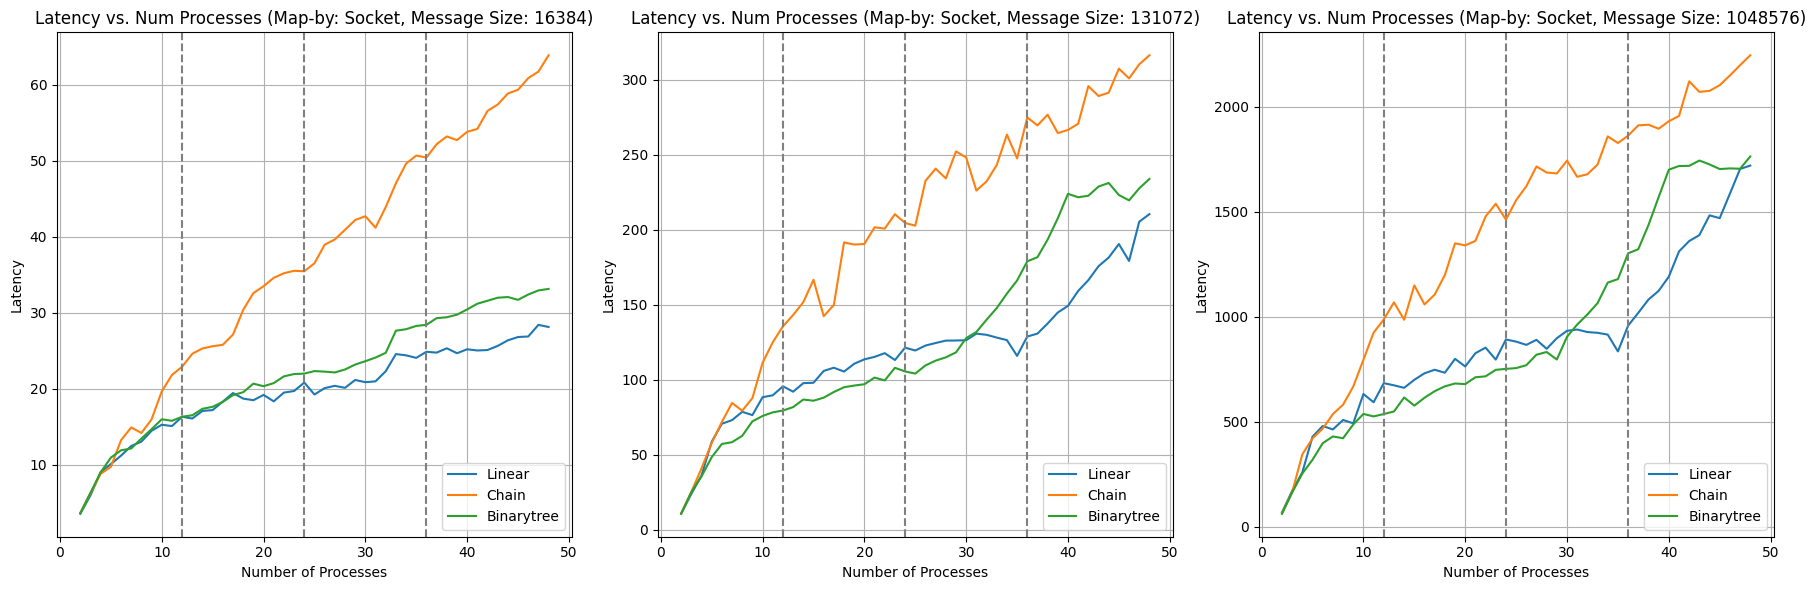

In [267]:
triple_plot(['socket', 'socket', 'socket'], [4, 64, 2048], plot_latency_vs_processes, algorithms, dfs)
triple_plot(['socket', 'socket', 'socket'], [16384, 131072, 1048576], plot_latency_vs_processes, algorithms, dfs)

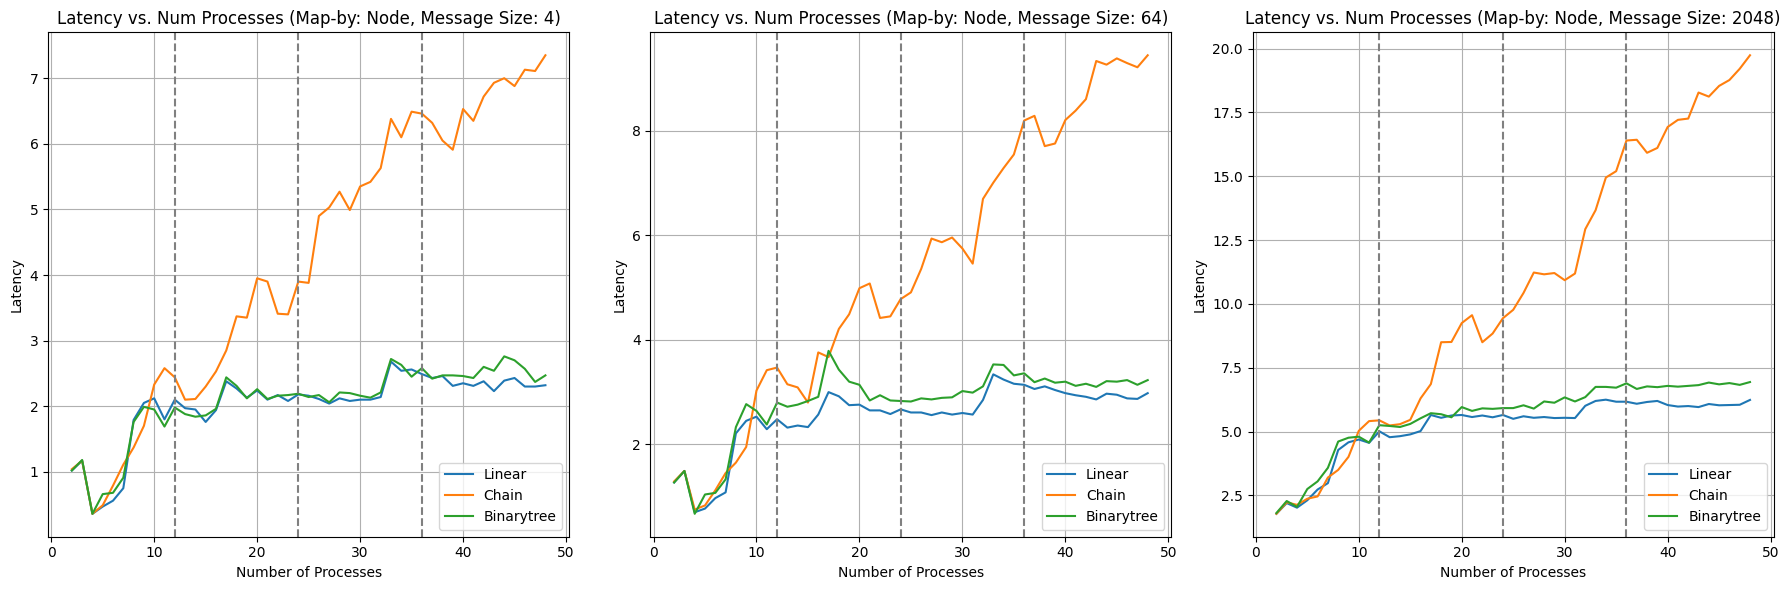

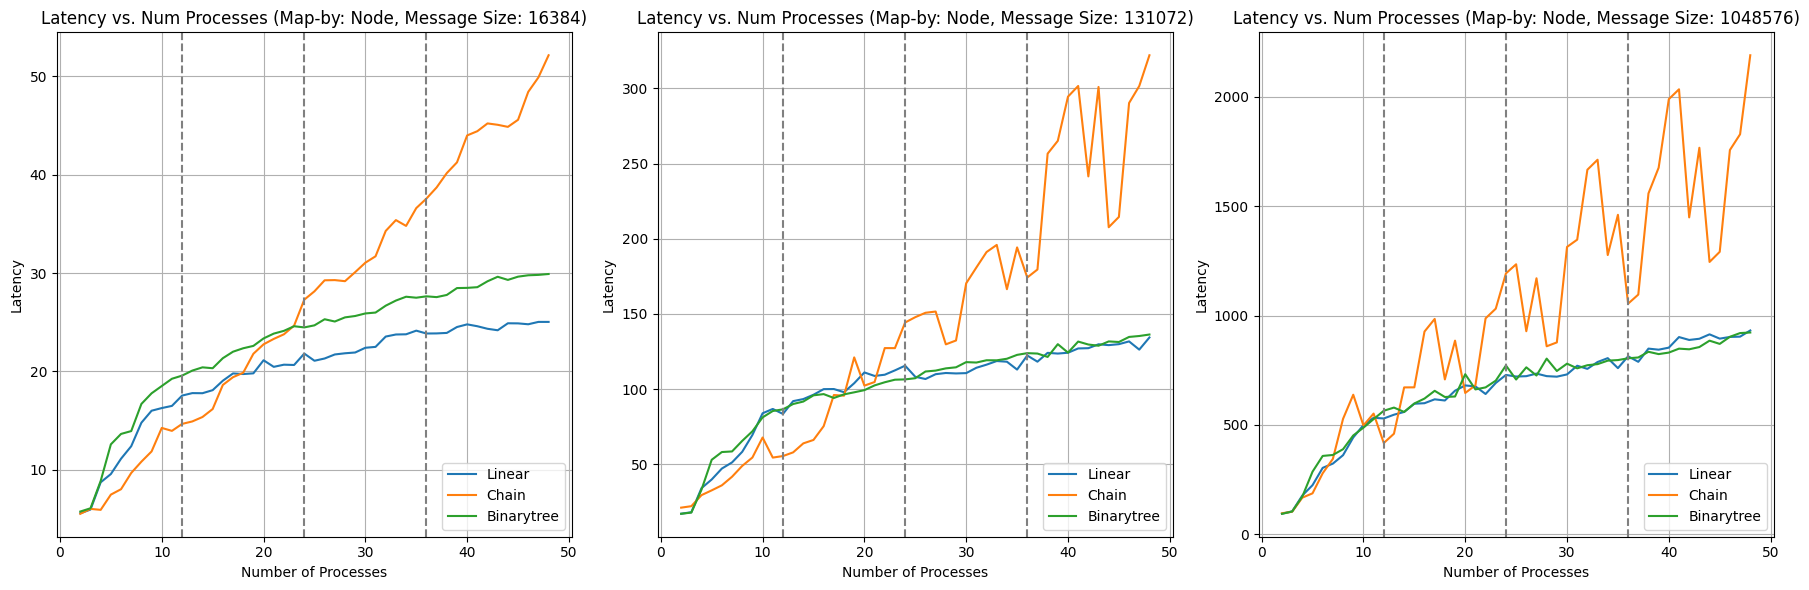

In [268]:
triple_plot(['node', 'node', 'node'], [4, 64, 2048], plot_latency_vs_processes, algorithms, dfs)
triple_plot(['node', 'node', 'node'], [16384, 131072, 1048576], plot_latency_vs_processes, algorithms, dfs)

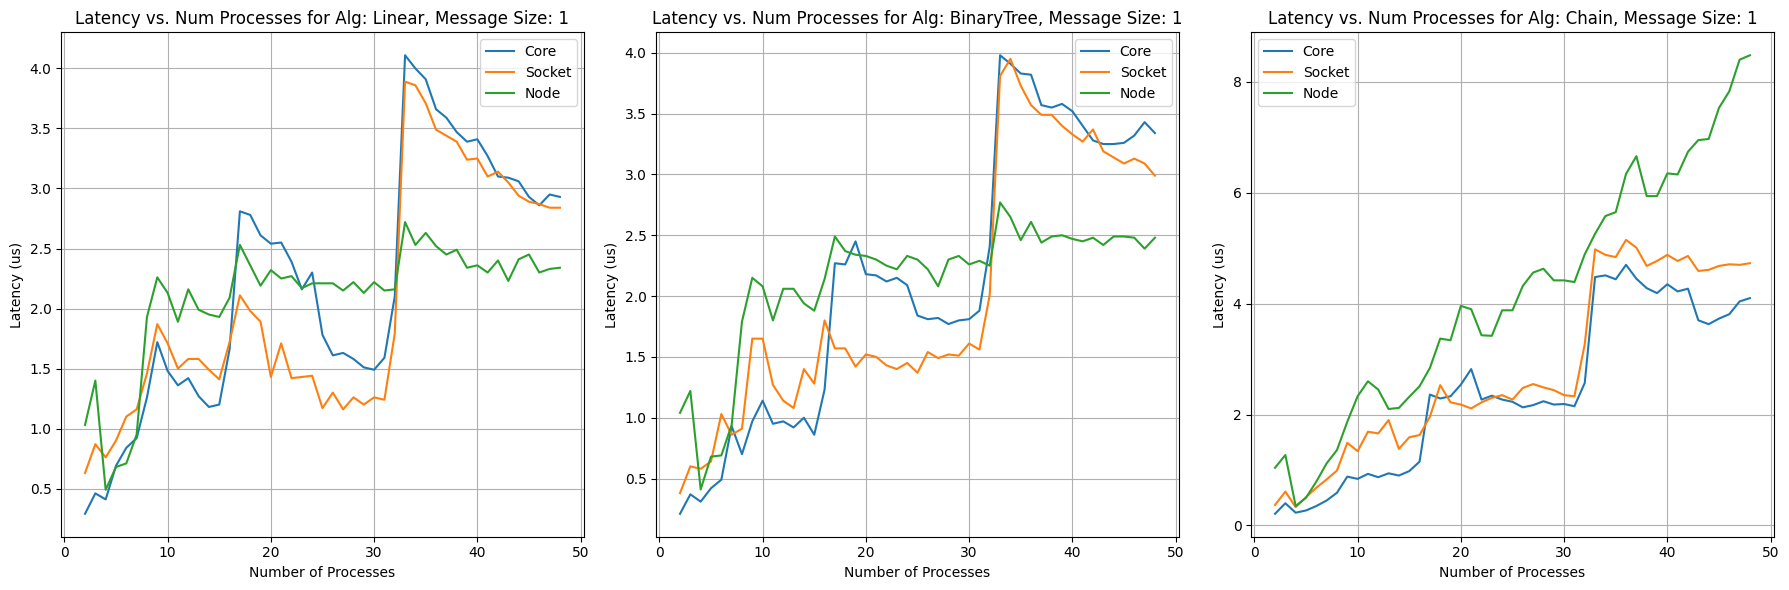

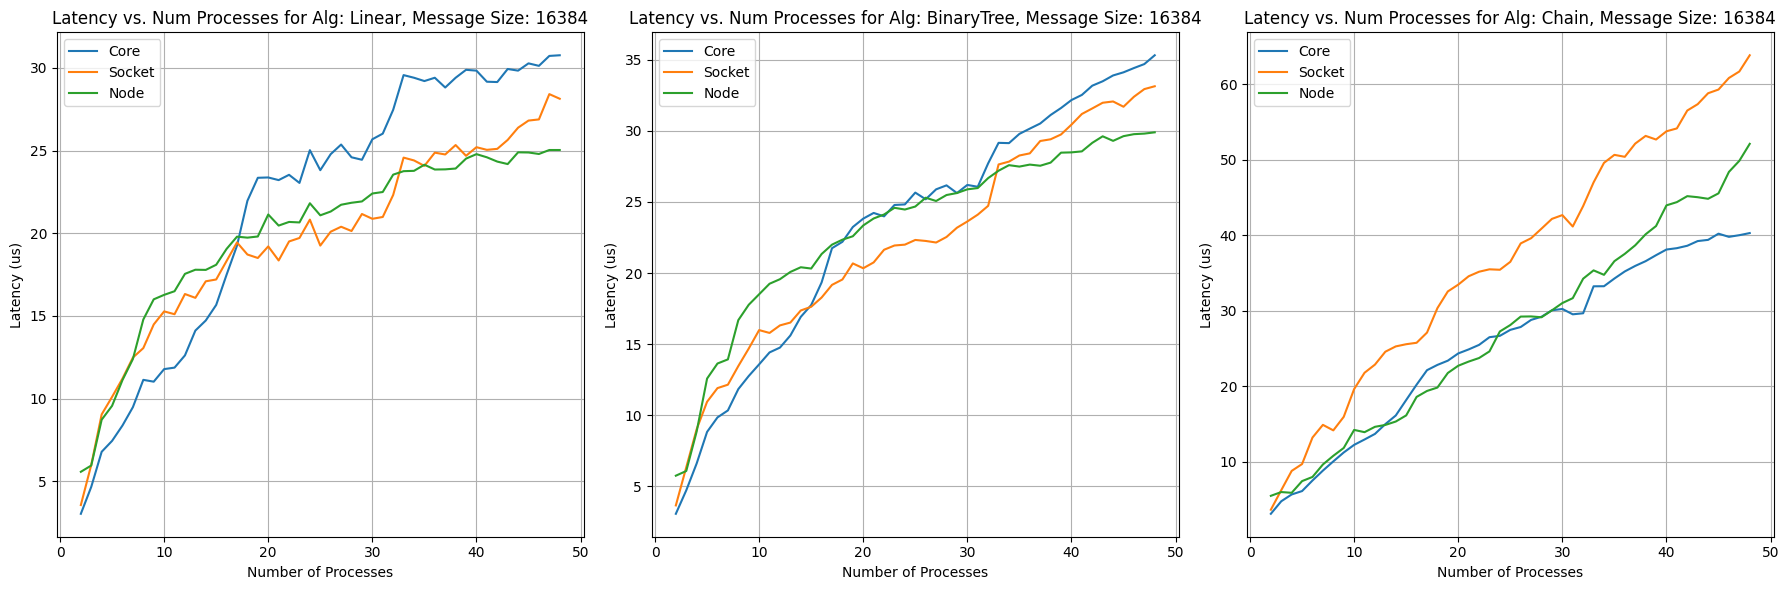

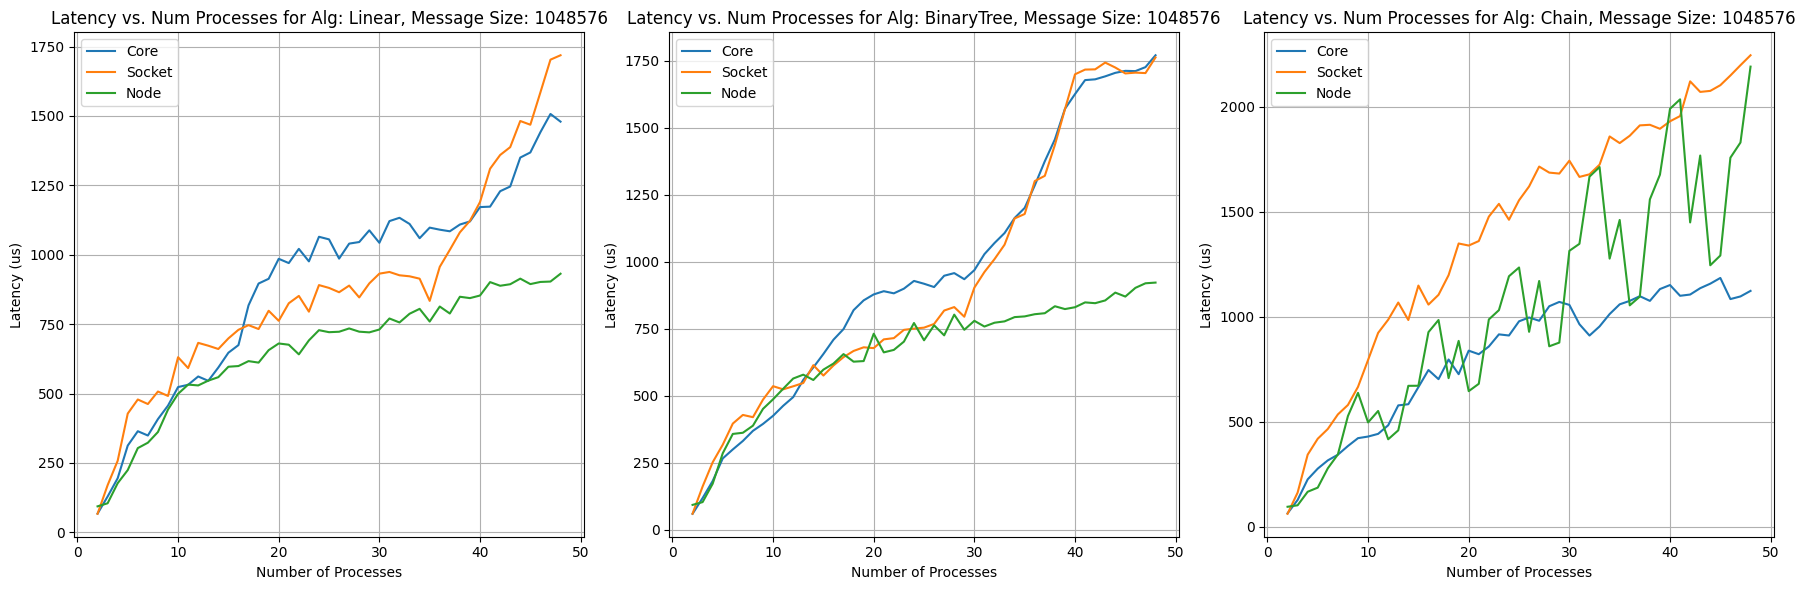

In [269]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 1, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 1, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 1, allocations)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 16384, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 16384, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 16384, allocations)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.sca(axs[0])
plot_latency_vs_processes_fixed_alg(bcast_linear,'Linear', 1048576, allocations)
plt.sca(axs[1])
plot_latency_vs_processes_fixed_alg(bcast_binarytree,'BinaryTree', 1048576, allocations)
plt.sca(axs[2])
plot_latency_vs_processes_fixed_alg(bcast_chain,'Chain', 1048576, allocations)
plt.tight_layout()
plt.show()

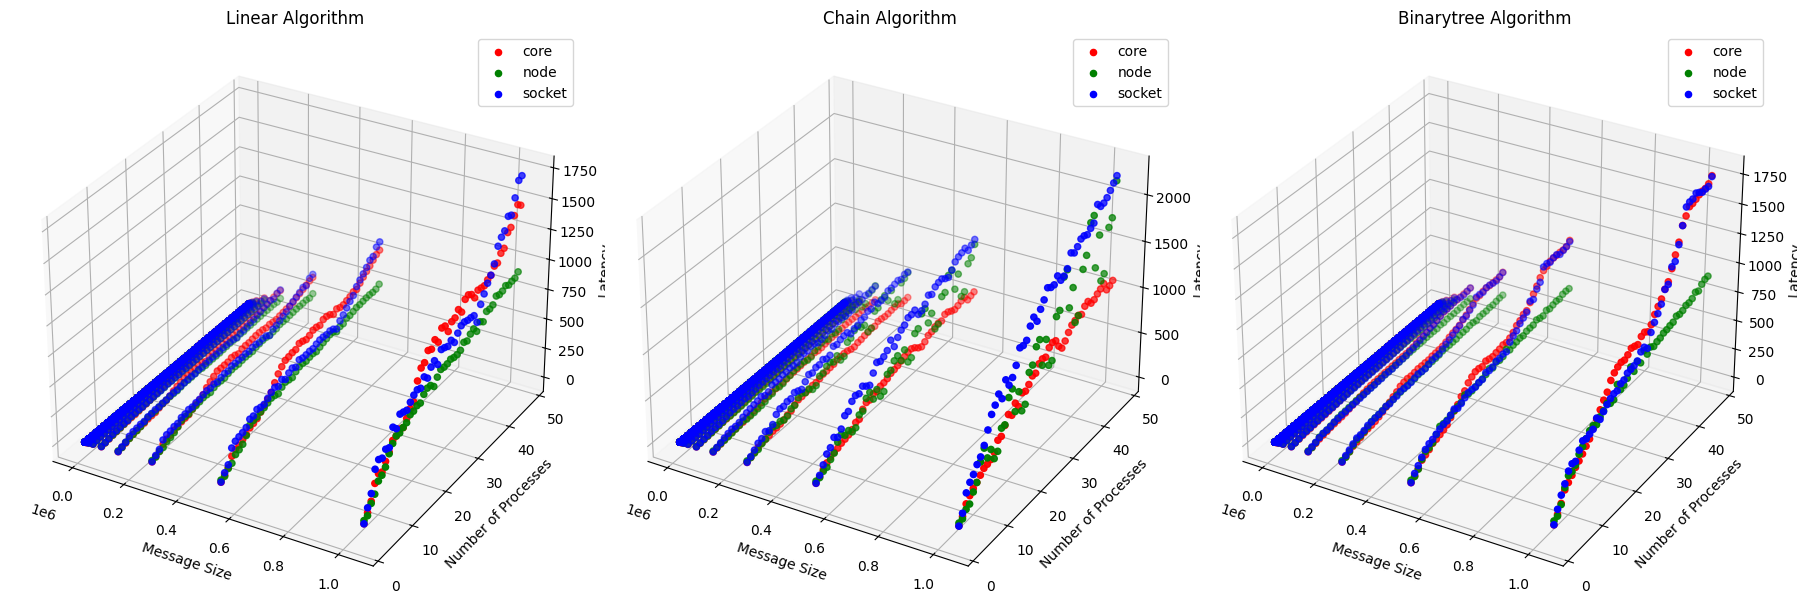

In [270]:
# Create a figure with four subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Iterate over each subplot and corresponding algorithm's DataFrame
for ax, algorithm, df in zip(axs.flatten(), algorithms, dfs):
    # Iterate over each group-by option (node, core, socket)
    for allocation, color in zip(['core', 'node', 'socket'], ['r', 'g', 'b']):
        # Filter DataFrame based on allocation type
        df_allocation = df[df['Allocation'] == allocation]
        # Scatter plot for the current group-by option
        ax.scatter(df_allocation['MessageSize'], df_allocation['Processes'], df_allocation['Latency'], c=color, label=allocation, marker='o')

    # Set labels and title
    ax.set_xlabel('Message Size')  # Switched with 'Number of Processes'
    ax.set_ylabel('Number of Processes')  # Switched with 'Message Size'
    ax.set_zlabel('Latency')
    ax.set_title(f'{algorithm} Algorithm')
    ax.legend()

plt.tight_layout()
plt.show()

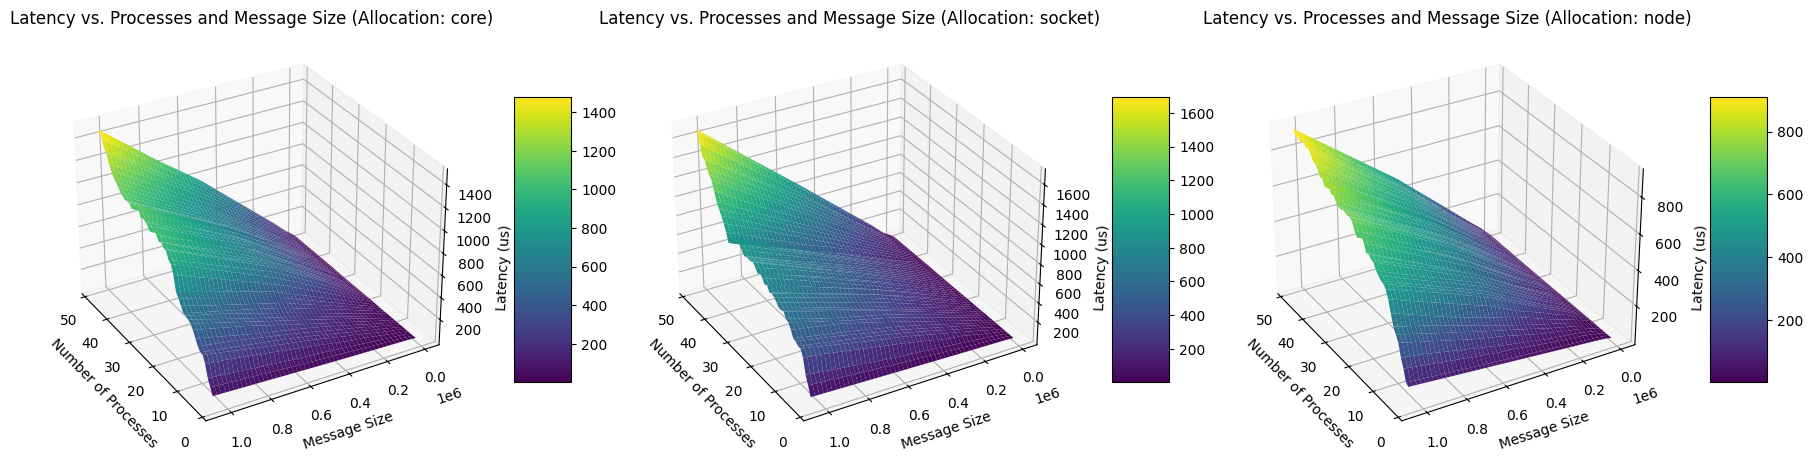

In [300]:
# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Plot on each axis
plot_3d_latency(bcast_linear, 'core', axs[0])
plot_3d_latency(bcast_linear, 'socket', axs[1])
plot_3d_latency(bcast_linear, 'node', axs[2])

# Adjust layout
plt.tight_layout()
plt.show()

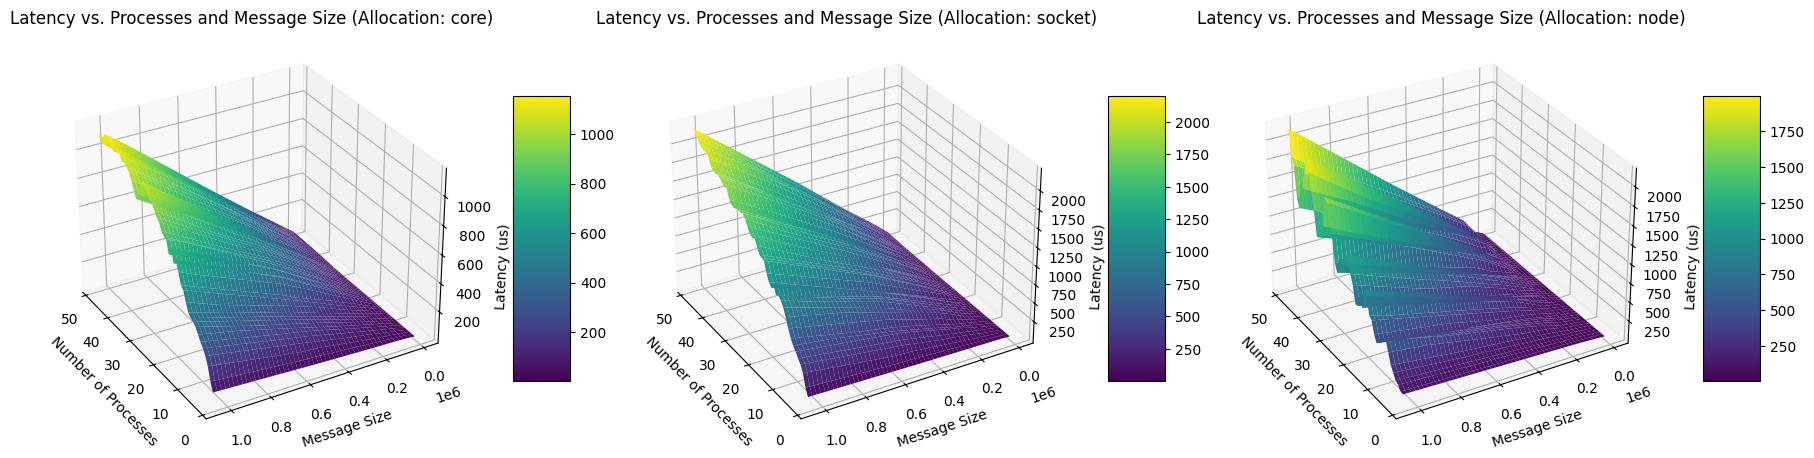

In [301]:
# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Plot on each axis
plot_3d_latency(bcast_chain, 'core', axs[0])
plot_3d_latency(bcast_chain, 'socket', axs[1])
plot_3d_latency(bcast_chain, 'node', axs[2])

# Adjust layout
plt.tight_layout()
plt.show()

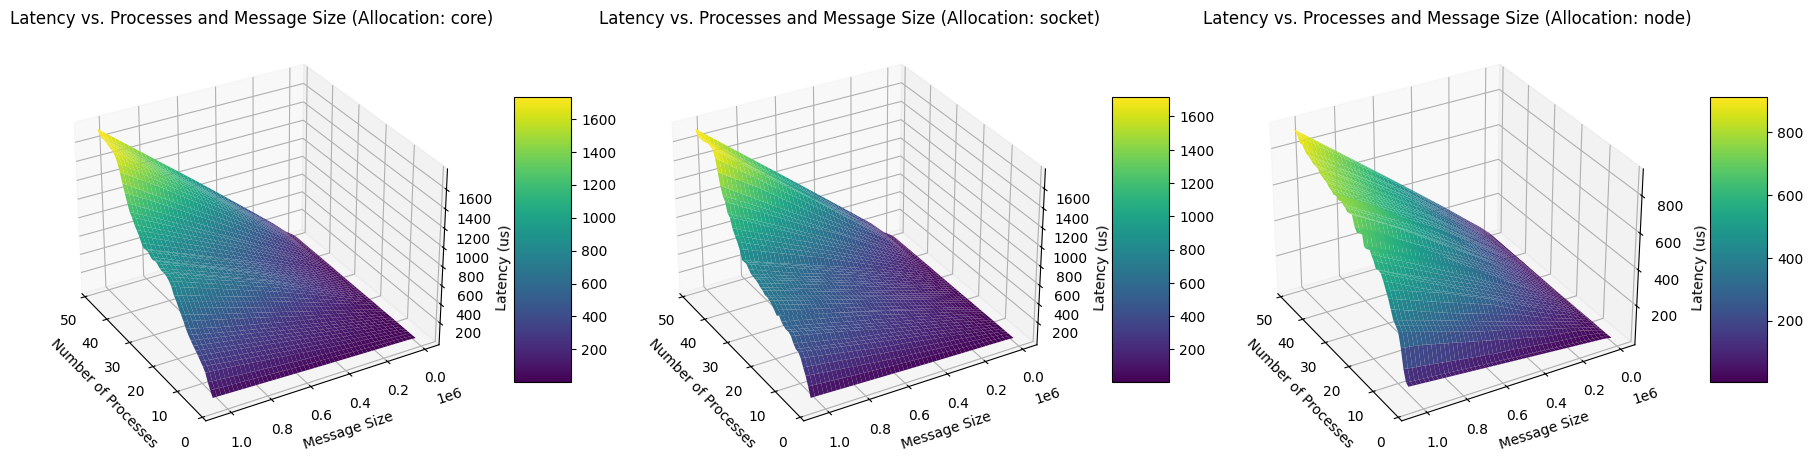

In [302]:
# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Plot on each axis
plot_3d_latency(bcast_binarytree, 'core', axs[0])
plot_3d_latency(bcast_binarytree, 'socket', axs[1])
plot_3d_latency(bcast_binarytree, 'node', axs[2])

# Adjust layout
plt.tight_layout()
plt.show()